#Census Data Exploration - Income in LA County

#### Aurelia Mora Camacho

## Introduction

For this week's assignment, I will be analyzing level of income differences across LA County by using 2019 Census data. I believe that this data will connect to our overall project goal of visualizing mobile park home communities and their access to opportunities and resources. To help do this, I will be (attempting) to sort and map the data in a way that clearly shows wealth disparities across the County. 

## Step 1: Import python libraries that I may/will be using 

In [208]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Step 2: Import the data (the geojson file)

In [209]:
income = gpd.read_file('data/acs2019_5yr_B19001_86000US91202.geojson')

## Step 3: Let's get familiar with this data!

In [210]:
income.shape

(303, 37)

This shows me the number of rows and columns in this dataset

In [211]:
income.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,185622.0,3065.0,157633.0,2635.0,135556.0,2423.0,142811.0,2441.0,129873.0,2231.0,138123.0,2419.0,126853.0,2517.0,127576.0,1954.0,116721.0,2408.0,225974.0,3003.0,300644.0,3633.0,408135.0,4079.0,310236.0,3564.0,213893.0,2732.0,258815.0,3306.0,338330.0,4049.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,86000US90001,90001,13669.0,287.0,1121.0,216.0,762.0,140.0,815.0,174.0,948.0,182.0,752.0,168.0,955.0,204.0,1012.0,187.0,682.0,143.0,550.0,118.0,1382.0,189.0,1299.0,215.0,1516.0,216.0,863.0,161.0,519.0,115.0,396.0,122.0,97.0,52.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,12917.0,304.0,1342.0,249.0,1355.0,240.0,964.0,197.0,901.0,194.0,770.0,185.0,728.0,142.0,790.0,181.0,675.0,169.0,538.0,140.0,879.0,197.0,1238.0,251.0,1212.0,192.0,781.0,184.0,335.0,99.0,257.0,101.0,152.0,75.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,17484.0,353.0,1649.0,227.0,1441.0,237.0,1197.0,205.0,1380.0,250.0,998.0,167.0,985.0,184.0,968.0,193.0,1073.0,223.0,894.0,179.0,1302.0,200.0,1598.0,258.0,1979.0,291.0,958.0,169.0,539.0,126.0,366.0,120.0,157.0,66.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,22004.0,363.0,1229.0,181.0,1217.0,218.0,1088.0,205.0,1297.0,245.0,1404.0,242.0,1149.0,178.0,1245.0,213.0,1191.0,222.0,1265.0,185.0,1663.0,252.0,2159.0,282.0,2328.0,275.0,1403.0,206.0,782.0,170.0,780.0,147.0,1804.0,214.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."


Here I see the first 5 rows of my data

In [212]:
income.tail()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
298,86000US93552,93552,9806.0,295.0,264.0,106.0,343.0,136.0,348.0,160.0,310.0,120.0,257.0,129.0,461.0,148.0,501.0,163.0,404.0,127.0,555.0,177.0,731.0,181.0,1429.0,274.0,1777.0,323.0,1270.0,259.0,600.0,149.0,295.0,114.0,261.0,113.0,"MULTIPOLYGON (((-118.07917 34.51358, -118.0716..."
299,86000US93553,93553,670.0,135.0,13.0,20.0,0.0,12.0,71.0,38.0,58.0,63.0,28.0,30.0,28.0,25.0,20.0,23.0,58.0,40.0,44.0,58.0,23.0,22.0,94.0,82.0,105.0,71.0,45.0,31.0,25.0,24.0,15.0,21.0,43.0,48.0,"MULTIPOLYGON (((-118.01330 34.35839, -118.0132..."
300,86000US93560,93560,7148.0,299.0,604.0,235.0,143.0,83.0,318.0,156.0,375.0,150.0,309.0,172.0,236.0,120.0,275.0,163.0,304.0,176.0,297.0,123.0,691.0,231.0,582.0,157.0,800.0,222.0,873.0,191.0,494.0,168.0,565.0,176.0,282.0,149.0,"MULTIPOLYGON (((-118.43128 34.88985, -118.4312..."
301,86000US93563,93563,96.0,35.0,8.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,7.0,11.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,10.0,10.0,28.0,24.0,0.0,12.0,0.0,12.0,27.0,22.0,16.0,17.0,"MULTIPOLYGON (((-117.87587 34.45627, -117.8756..."
302,86000US93591,93591,1948.0,123.0,195.0,94.0,67.0,41.0,79.0,49.0,76.0,44.0,48.0,54.0,95.0,62.0,69.0,58.0,188.0,82.0,258.0,92.0,278.0,118.0,182.0,86.0,148.0,66.0,160.0,99.0,8.0,13.0,40.0,32.0,57.0,57.0,"MULTIPOLYGON (((-117.99174 34.66059, -117.9915..."


Here I see the last 5 rows of my data

In [213]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             303 non-null    object  
 1   name              303 non-null    object  
 2   B19001001         303 non-null    float64 
 3   B19001001, Error  303 non-null    float64 
 4   B19001002         303 non-null    float64 
 5   B19001002, Error  303 non-null    float64 
 6   B19001003         303 non-null    float64 
 7   B19001003, Error  303 non-null    float64 
 8   B19001004         303 non-null    float64 
 9   B19001004, Error  303 non-null    float64 
 10  B19001005         303 non-null    float64 
 11  B19001005, Error  303 non-null    float64 
 12  B19001006         303 non-null    float64 
 13  B19001006, Error  303 non-null    float64 
 14  B19001007         303 non-null    float64 
 15  B19001007, Error  303 non-null    float64 
 16  B19001008         

Here I see the column names and table information (which is a little more messy than I had hoped it'd be)

Let's plot the data and see what populates!

<AxesSubplot:>

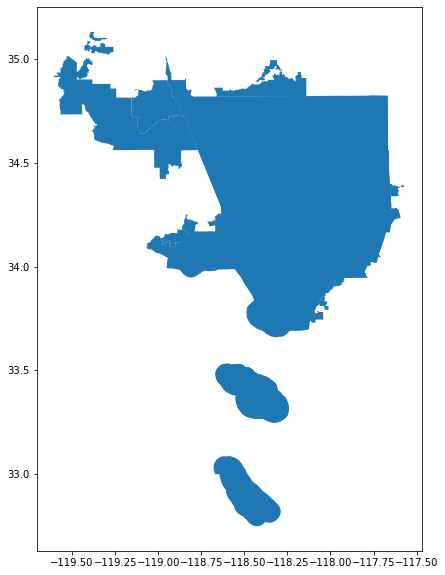

In [145]:
income.plot(figsize = (10,10))

This gives me a general idea of which areas in the County are covered/represented in the data, but I can't decipher much else (yet)

## Step 4: Cleaning up my columns!

There are many columns that I probably don't need, so now I will go ahead and identify those and start to clean up my data a bit, before doing that, I want to be sure that I will be able to see ALL of my data

In [146]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

This command will ensure that I can see ALL the data

In [147]:
income.sample()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
152,86000US90755,90755,4743.0,285.0,258.0,122.0,88.0,61.0,285.0,149.0,185.0,117.0,104.0,95.0,177.0,110.0,179.0,103.0,55.0,39.0,176.0,118.0,395.0,158.0,454.0,163.0,505.0,146.0,643.0,234.0,345.0,131.0,204.0,96.0,690.0,198.0,"MULTIPOLYGON (((-118.18460 33.80710, -118.1845..."


This was just a quick test to be sure that all data will be outputted

In [148]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

This command has allowed me to see all existing columns so I know which ones I want to keep and which ones I don't, which I will begin to clean up, below

In [149]:
columns_to_keep=['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

These are the columns I've decided to keep so let's commit it and make it happen!

In [150]:
income = income[columns_to_keep]

Now I need to refamiliarize myself with the pared down columns

In [151]:
income.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,185622.0,157633.0,135556.0,142811.0,129873.0,138123.0,126853.0,127576.0,116721.0,225974.0,300644.0,408135.0,310236.0,213893.0,258815.0,338330.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,86000US90001,90001,13669.0,1121.0,762.0,815.0,948.0,752.0,955.0,1012.0,682.0,550.0,1382.0,1299.0,1516.0,863.0,519.0,396.0,97.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,12917.0,1342.0,1355.0,964.0,901.0,770.0,728.0,790.0,675.0,538.0,879.0,1238.0,1212.0,781.0,335.0,257.0,152.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,17484.0,1649.0,1441.0,1197.0,1380.0,998.0,985.0,968.0,1073.0,894.0,1302.0,1598.0,1979.0,958.0,539.0,366.0,157.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,22004.0,1229.0,1217.0,1088.0,1297.0,1404.0,1149.0,1245.0,1191.0,1265.0,1663.0,2159.0,2328.0,1403.0,782.0,780.0,1804.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."


In [152]:
income.tail()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
298,86000US93552,93552,9806.0,264.0,343.0,348.0,310.0,257.0,461.0,501.0,404.0,555.0,731.0,1429.0,1777.0,1270.0,600.0,295.0,261.0,"MULTIPOLYGON (((-118.07917 34.51358, -118.0716..."
299,86000US93553,93553,670.0,13.0,0.0,71.0,58.0,28.0,28.0,20.0,58.0,44.0,23.0,94.0,105.0,45.0,25.0,15.0,43.0,"MULTIPOLYGON (((-118.01330 34.35839, -118.0132..."
300,86000US93560,93560,7148.0,604.0,143.0,318.0,375.0,309.0,236.0,275.0,304.0,297.0,691.0,582.0,800.0,873.0,494.0,565.0,282.0,"MULTIPOLYGON (((-118.43128 34.88985, -118.4312..."
301,86000US93563,93563,96.0,8.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.0,28.0,0.0,0.0,27.0,16.0,"MULTIPOLYGON (((-117.87587 34.45627, -117.8756..."
302,86000US93591,93591,1948.0,195.0,67.0,79.0,76.0,48.0,95.0,69.0,188.0,258.0,278.0,182.0,148.0,160.0,8.0,40.0,57.0,"MULTIPOLYGON (((-117.99174 34.66059, -117.9915..."


I still don't entirely know what I'm looking at, so I'm going to give these columns names

## Step 5: Renaming Columns!

In [153]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [154]:
income.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

The columns have names now! What do my newly renamed columns look like?

In [155]:
income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,185622.0,157633.0,135556.0,142811.0,129873.0,138123.0,126853.0,127576.0,116721.0,225974.0,300644.0,408135.0,310236.0,213893.0,258815.0,338330.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,86000US90001,90001,13669.0,1121.0,762.0,815.0,948.0,752.0,955.0,1012.0,682.0,550.0,1382.0,1299.0,1516.0,863.0,519.0,396.0,97.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,12917.0,1342.0,1355.0,964.0,901.0,770.0,728.0,790.0,675.0,538.0,879.0,1238.0,1212.0,781.0,335.0,257.0,152.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,17484.0,1649.0,1441.0,1197.0,1380.0,998.0,985.0,968.0,1073.0,894.0,1302.0,1598.0,1979.0,958.0,539.0,366.0,157.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,22004.0,1229.0,1217.0,1088.0,1297.0,1404.0,1149.0,1245.0,1191.0,1265.0,1663.0,2159.0,2328.0,1403.0,782.0,780.0,1804.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."


I want to be sure that all the math checks off and the data/columns are populating correctly and it is all accounted for

In [156]:
random_tract = income.sample()

In [157]:
random_tract

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
58,86000US90067,90067,1421.0,76.0,18.0,106.0,14.0,42.0,41.0,64.0,52.0,28.0,30.0,76.0,37.0,131.0,74.0,191.0,441.0,"MULTIPOLYGON (((-118.42129 34.05908, -118.4203..."


In [158]:
random_tract.iloc[0]['Total']

1421.0

What does the number above even mean? ("Write it out", below).

In [159]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 1421.0


In [160]:
print(random_tract.iloc[0]['Less than $10,000'] + 
      random_tract.iloc[0]['$10,000 to $14,999'] + 
      random_tract.iloc[0]['$15,000 to $19,999'] + 
      random_tract.iloc[0]['$20,000 to $24,999'] + 
      random_tract.iloc[0]['$25,000 to $29,999'] + 
      random_tract.iloc[0]['$30,000 to $34,999'] + 
      random_tract.iloc[0]['$35,000 to $39,999'] + 
      random_tract.iloc[0]['$40,000 to $44,999'] + 
      random_tract.iloc[0]['$45,000 to $49,999'] + 
      random_tract.iloc[0]['$50,000 to $59,999'] + 
      random_tract.iloc[0]['$60,000 to $74,999'] + 
      random_tract.iloc[0]['$75,000 to $99,999'] + 
      random_tract.iloc[0]['$100,000 to $124,999'] + 
      random_tract.iloc[0]['$125,000 to $149,999'] + 
      random_tract.iloc[0]['$150,000 to $199,999'] + 
      random_tract.iloc[0]['$200,000 or more'])

1421.0


## Step 6: Simple Math and Stats

In [161]:
income['Total'].mean()

22174.68316831683

In [162]:
income['Total'].median()

11387.0

In [163]:
income['Total'].describe()

count    3.030000e+02
mean     2.217468e+04
std      1.900063e+05
min      0.000000e+00
25%      7.069500e+03
50%      1.138700e+04
75%      1.521550e+04
max      3.316795e+06
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

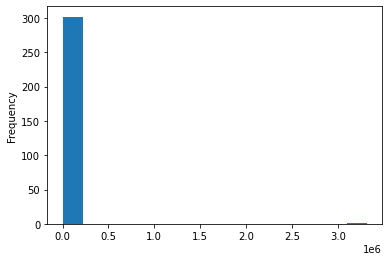

In [164]:
income['Total'].plot.hist(bins=15)

So this obviously doesn't tell me much (that I feel will be useful for our project). I want to be able to identify the economic disparities by income level across cities in LA County. I'm going to try to clean this up some more. 

## Step 7: Sorting the Data

Here I see the census tracts with the most household income information

In [165]:
income_sorted = income.sort_values(by='Total',ascending = False)

In [166]:
income_sorted[['geoid','Total']].head(10)

,geoid,Total
0,05000US06037,3316795.0
85,86000US90250,31905.0
42,86000US90044,29029.0
44,86000US90046,29025.0
156,86000US90805,27354.0
131,86000US90650,26964.0
25,86000US90026,26045.0
57,86000US90066,25785.0
32,86000US90034,25248.0
212,86000US91342,25121.0


<AxesSubplot:>

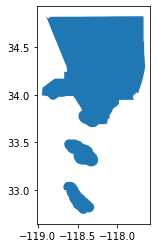

In [167]:
income_sorted.head(10).plot()

I want to start breaking the data down by income level, but I'm still not sure which breakdown will be most useful, so I will continue to use "Total" in my plotting

<AxesSubplot:>

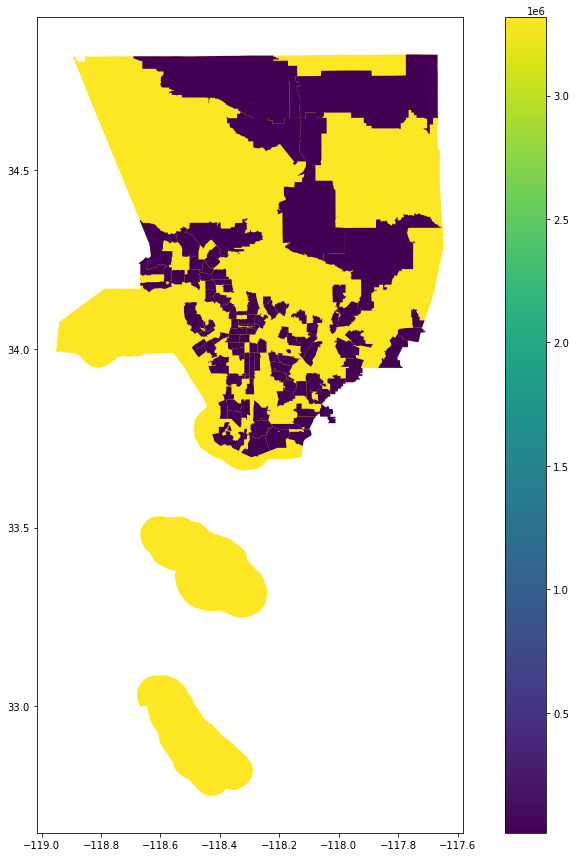

In [168]:
income_sorted.head(100).plot(figsize=(15,15),column='Total',legend=True)

## Step 8: Dropping Data

Before further sorting the data, I want to be sure that I am dropping any rows/census blocks that have no data/values associated with them 

In [169]:
income[income['Total']==0]

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
62,86000US90073,90073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.46826 34.06251, -118.4681..."
64,86000US90079,90079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25672 34.04046, -118.2549..."
66,86000US90090,90090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.24746 34.07325, -118.2470..."
68,86000US90095,90095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.44954 34.07142, -118.4495..."
90,86000US90263,90263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.71338 34.04223, -118.7133..."
119,86000US90506,90506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.33491 33.88563, -118.3347..."
151,86000US90747,90747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25235 33.86276, -118.2523..."
164,86000US90822,90822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.12235 33.77945, -118.1223..."
165,86000US90831,90831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.20416 33.76936, -118.2041..."
208,86000US91330,91330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.53172 34.24457, -118.5274..."


Above, we see the rows/census blocks that have a zero value. Now I can drop them from my data.

In [170]:
income = income.drop([62])
income = income.drop([64])
income = income.drop([66])
income = income.drop([68])
income = income.drop([90])
income = income.drop([119])
income = income.drop([151])
income = income.drop([164])
income = income.drop([165])
income = income.drop([208])
income = income.drop([226])

By using the list command below, I can get a refresher on my columns as I start to get a better idea of which income breakdowns I want to focus on

In [171]:
list(income)

['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

As I get closer to mapping the data, knowing the percentages (and not just the hard number) of households across the income levels will allow me to create cleaner maps and visualize economic disparity across LA County

## Step 9: Finding the percentage of households that fall within each income category

In [174]:
income['Percent Less than $10,000'] = income['Less than $10,000']/income['Total']*100
income['Percent $10,000 to $14,999'] = income['$10,000 to $14,999']/income['Total']*100
income['Percent $15,000 to $19,999'] = income['$15,000 to $19,999']/income['Total']*100
income['Percent $20,000 to $24,999'] = income['$20,000 to $24,999']/income['Total']*100
income['Percent $30,000 to $34,999'] = income['$30,000 to $34,999']/income['Total']*100
income['Percent $35,000 to $39,999'] = income['$35,000 to $39,999']/income['Total']*100
income['Percent $40,000 to $44,999'] = income['$40,000 to $44,999']/income['Total']*100
income['Percent $45,000 to $49,999'] = income['$45,000 to $49,999']/income['Total']*100
income['Percent $50,000 to $59,999'] = income['$50,000 to $59,999']/income['Total']*100
income['Percent $60,000 to $74,999'] = income['$60,000 to $74,999']/income['Total']*100
income['Percent $75,000 to $99,999'] = income['$75,000 to $99,999']/income['Total']*100
income['Percent $100,000 to $124,999'] = income['$100,000 to $124,999']/income['Total']*100
income['Percent $125,000 to $149,999'] = income['$125,000 to $149,999']/income['Total']*100
income['Percent $150,000 to $199,999'] = income['$150,000 to $199,999']/income['Total']*100
income['Percent $200,000 or more'] = income['$200,000 or more']/income['Total']*100

What do my new percentage columns look like? 

In [175]:
income.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more"
0,05000US06037,"Los Angeles County, CA",3316795.0,185622.0,157633.0,135556.0,142811.0,129873.0,138123.0,126853.0,127576.0,116721.0,225974.0,300644.0,408135.0,310236.0,213893.0,258815.0,338330.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033...",5.596427,4.752570,4.086957,4.305693,4.164351,3.824566,3.846364,3.519090,6.813023,9.064292,12.305102,9.353487,6.448786,7.803165,10.200510
1,86000US90001,90001,13669.0,1121.0,762.0,815.0,948.0,752.0,955.0,1012.0,682.0,550.0,1382.0,1299.0,1516.0,863.0,519.0,396.0,97.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620...",8.201039,5.574658,5.962397,6.935401,6.986612,7.403614,4.989392,4.023703,10.110469,9.503256,11.090789,6.313556,3.796913,2.897066,0.709635
2,86000US90002,90002,12917.0,1342.0,1355.0,964.0,901.0,770.0,728.0,790.0,675.0,538.0,879.0,1238.0,1212.0,781.0,335.0,257.0,152.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651...",10.389409,10.490052,7.463033,6.975304,5.635984,6.115971,5.225672,4.165054,6.804986,9.584269,9.382984,6.046296,2.593481,1.989626,1.176744
3,86000US90003,90003,17484.0,1649.0,1441.0,1197.0,1380.0,998.0,985.0,968.0,1073.0,894.0,1302.0,1598.0,1979.0,958.0,539.0,366.0,157.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826...",9.431480,8.241821,6.846259,7.892931,5.633722,5.536491,6.137040,5.113246,7.446809,9.139785,11.318920,5.479295,3.082819,2.093342,0.897964
4,86000US90004,90004,22004.0,1229.0,1217.0,1088.0,1297.0,1404.0,1149.0,1245.0,1191.0,1265.0,1663.0,2159.0,2328.0,1403.0,782.0,780.0,1804.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381...",5.585348,5.530813,4.944556,5.894383,5.221778,5.658062,5.412652,5.748955,7.557717,9.811852,10.579895,6.376113,3.553899,3.544810,8.198509


In [176]:
income.tail()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more"
298,86000US93552,93552,9806.0,264.0,343.0,348.0,310.0,257.0,461.0,501.0,404.0,555.0,731.0,1429.0,1777.0,1270.0,600.0,295.0,261.0,"MULTIPOLYGON (((-118.07917 34.51358, -118.0716...",2.692229,3.497858,3.548848,3.161330,4.701203,5.109117,4.119927,5.659800,7.454620,14.572711,18.121558,12.951254,6.118703,3.008362,2.661636
299,86000US93553,93553,670.0,13.0,0.0,71.0,58.0,28.0,28.0,20.0,58.0,44.0,23.0,94.0,105.0,45.0,25.0,15.0,43.0,"MULTIPOLYGON (((-118.01330 34.35839, -118.0132...",1.940299,0.000000,10.597015,8.656716,4.179104,2.985075,8.656716,6.567164,3.432836,14.029851,15.671642,6.716418,3.731343,2.238806,6.417910
300,86000US93560,93560,7148.0,604.0,143.0,318.0,375.0,309.0,236.0,275.0,304.0,297.0,691.0,582.0,800.0,873.0,494.0,565.0,282.0,"MULTIPOLYGON (((-118.43128 34.88985, -118.4312...",8.449916,2.000560,4.448797,5.246223,3.301623,3.847230,4.252938,4.155008,9.667040,8.142138,11.191942,12.213206,6.911024,7.904309,3.945159
301,86000US93563,93563,96.0,8.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.0,28.0,0.0,0.0,27.0,16.0,"MULTIPOLYGON (((-117.87587 34.45627, -117.8756...",8.333333,0.000000,0.000000,0.000000,7.291667,0.000000,0.000000,0.000000,0.000000,10.416667,29.166667,0.000000,0.000000,28.125000,16.666667
302,86000US93591,93591,1948.0,195.0,67.0,79.0,76.0,48.0,95.0,69.0,188.0,258.0,278.0,182.0,148.0,160.0,8.0,40.0,57.0,"MULTIPOLYGON (((-117.99174 34.66059, -117.9915...",10.010267,3.439425,4.055441,3.901437,4.876797,3.542094,9.650924,13.244353,14.271047,9.342916,7.597536,8.213552,0.410678,2.053388,2.926078


<AxesSubplot:>

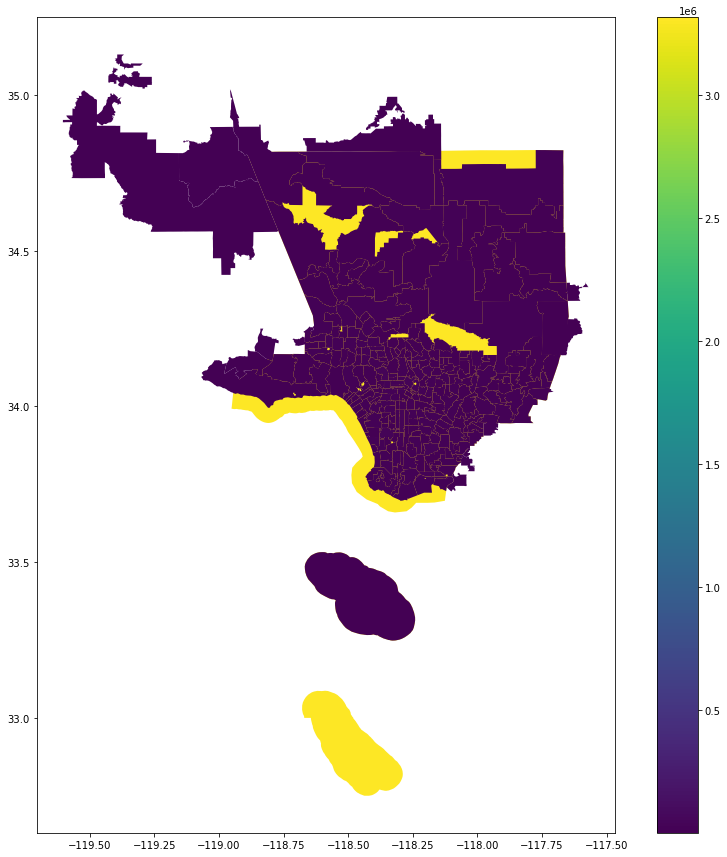

In [178]:
income.plot(figsize=(15,15),column='Total',legend=True)

After looking at the above map (which still doesn't show as much difference as I had hoped it would), I feel it may be better to understand income levels across the County if they were grouped into more specific brackets, which I have attempted to do here.

In [186]:
income['Percent Less than $10,000'] = income['Percent Less than $10,000']
income['Percent $10,000 to $19,999'] = income['Percent $10,000 to $14,999']+income['Percent $15,000 to $19,999'] 
income['Percent $20,000 to $34,999'] = income['Percent $20,000 to $24,999']+income['Percent $30,000 to $34,999']
income['Percent $35,000 to $49,999'] = income['Percent $35,000 to $39,999']+income['Percent $40,000 to $44,999']+income['Percent $45,000 to $49,999'] 
income['Percent $50,000 to $74,999'] = income['Percent $50,000 to $59,999']+income['Percent $60,000 to $74,999'] 
income['Percent $75,000 to $99,999'] = income['Percent $75,000 to $99,999']
income['Percent above $100,000'] = income['Percent $100,000 to $124,999']+income['Percent $125,000 to $149,999']+income['Percent $150,000 to $199,999']+income['Percent $200,000 or more'] 

In [187]:
income.sample()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent $10,000 to $19,999","Percent $20,000 to $34,999","Percent $35,000 to $49,999","Percent $50,000 to $74,999","Percent above $100,000"
210,86000US91335,91335,24391.0,875.0,1461.0,972.0,1139.0,892.0,1150.0,1215.0,889.0,1048.0,1872.0,2796.0,2817.0,2402.0,1576.0,1820.0,1467.0,"MULTIPOLYGON (((-118.56229 34.21911, -118.5579...",3.587389,5.989914,3.985076,4.669755,4.714854,4.981346,3.644787,4.296667,7.674962,11.463245,11.549342,9.847895,6.4614,7.461769,6.014514,9.974991,9.384609,12.922799,19.138207,29.785577


Here I see that my new columns have been added! Now I'm going to try to clean up my data a little bit more. 

## Step 10: Cleaning up my columns (continued)

In [188]:
new_columns_to_keep=['geoid',
 'name',
 'Total',
 'Percent Less than $10,000',
 'Percent $10,000 to $19,999',
 'Percent $20,000 to $34,999',
 'Percent $35,000 to $49,999',
 'Percent $50,000 to $74,999',
 'Percent $75,000 to $99,999',
 'Percent above $100,000',
 'geometry']

In [190]:
income = income[new_columns_to_keep]

In [191]:
income.sample()

,geoid,name,Total,"Percent Less than $10,000","Percent $10,000 to $19,999","Percent $20,000 to $34,999","Percent $35,000 to $49,999","Percent $50,000 to $74,999","Percent $75,000 to $99,999","Percent above $100,000",geometry
210,86000US91335,91335,24391.0,3.587389,9.974991,9.384609,12.922799,19.138207,11.549342,29.785577,"MULTIPOLYGON (((-118.56229 34.21911, -118.5579..."


Now I have a much cleaner and simpler set of columns, which will (hopefully) create some ~pretty~ maps!

## Step 11: Visualizing the Data and Making Maps!

Text(0.5, 1.0, 'Percent above $75,000')

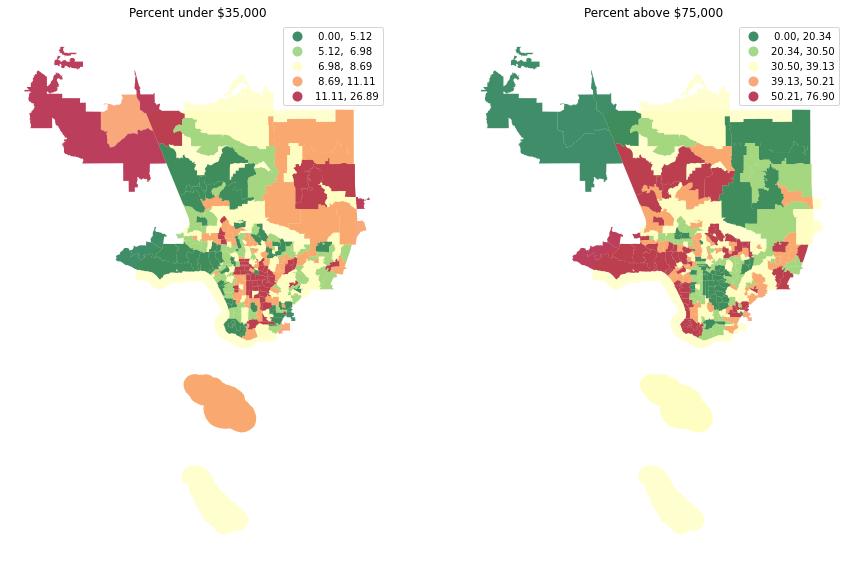

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

income.plot(column='Percent $10,000 to $19,999'and'Percent $20,000 to $34,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent under $35,000")

income.plot(column='Percent $75,000 to 99,999'and'Percent above $100,000', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent above $75,000")

In comparing these maps, we see how income levels vary across County localities. This reflects what is generally known when analyzing access to opportunity and resources from a personal/qualitative perspective. On the left we see that the majority of households with an annual income below $35,000 is concentrated in the Central and South Central regions and outer borders of the County. On the right, we see that households with an annual income above $75,000 are located predominantly on the west side of the County. 

Now I want to see if I can get a little more detail out of this map and data to show which census tracts have the highest concentrations of households with an annual income below $35,000. Specifically, which census tracts where more than 15% of households have an annual income less than $35,000.

In [200]:
income[income['Percent $10,000 to $19,999'and'Percent $20,000 to $34,999'] > 15]

,geoid,name,Total,"Percent Less than $10,000","Percent $10,000 to $19,999","Percent $20,000 to $34,999","Percent $35,000 to $49,999","Percent $50,000 to $74,999","Percent $75,000 to $99,999","Percent above $100,000",geometry
42,86000US90044,90044,29029.0,10.678976,18.095697,15.022908,13.965345,13.875779,9.921113,13.090358,"MULTIPOLYGON (((-118.30906 33.92629, -118.3090..."
61,86000US90071,90071,119.0,4.201681,0.000000,26.890756,0.000000,25.210084,33.613445,10.084034,"MULTIPOLYGON (((-118.25932 34.05236, -118.2592..."
93,86000US90270,90270,6684.0,4.892280,12.447636,15.020946,11.909037,19.763615,10.727110,15.380012,"MULTIPOLYGON (((-118.20466 33.99665, -118.2044..."
107,86000US90304,90304,6583.0,3.448276,11.195504,15.251405,14.826067,22.269482,10.284065,16.831232,"MULTIPOLYGON (((-118.37004 33.94486, -118.3700..."
161,86000US90813,90813,17192.0,6.154025,16.466961,15.809679,16.141228,17.694276,10.452536,10.586319,"MULTIPOLYGON (((-118.24061 33.77338, -118.2406..."
257,86000US91731,91731,8263.0,6.184195,14.534673,15.127678,14.909839,18.358950,11.121869,14.098996,"MULTIPOLYGON (((-118.06264 34.08343, -118.0624..."
287,86000US93243,93243,676.0,0.147929,26.775148,18.195266,7.100592,28.994083,4.142012,14.644970,"MULTIPOLYGON (((-118.95750 34.93016, -118.9575..."
294,86000US93543,93543,3698.0,6.057328,9.113034,16.603569,13.656030,18.631693,8.274743,24.580855,"MULTIPOLYGON (((-118.03022 34.50038, -118.0301..."


In [ ]:
To provide some more geographic context to the above maps, I will now add a basemap!

In [196]:
income_web_mercator = income.to_crs(epsg=3857)

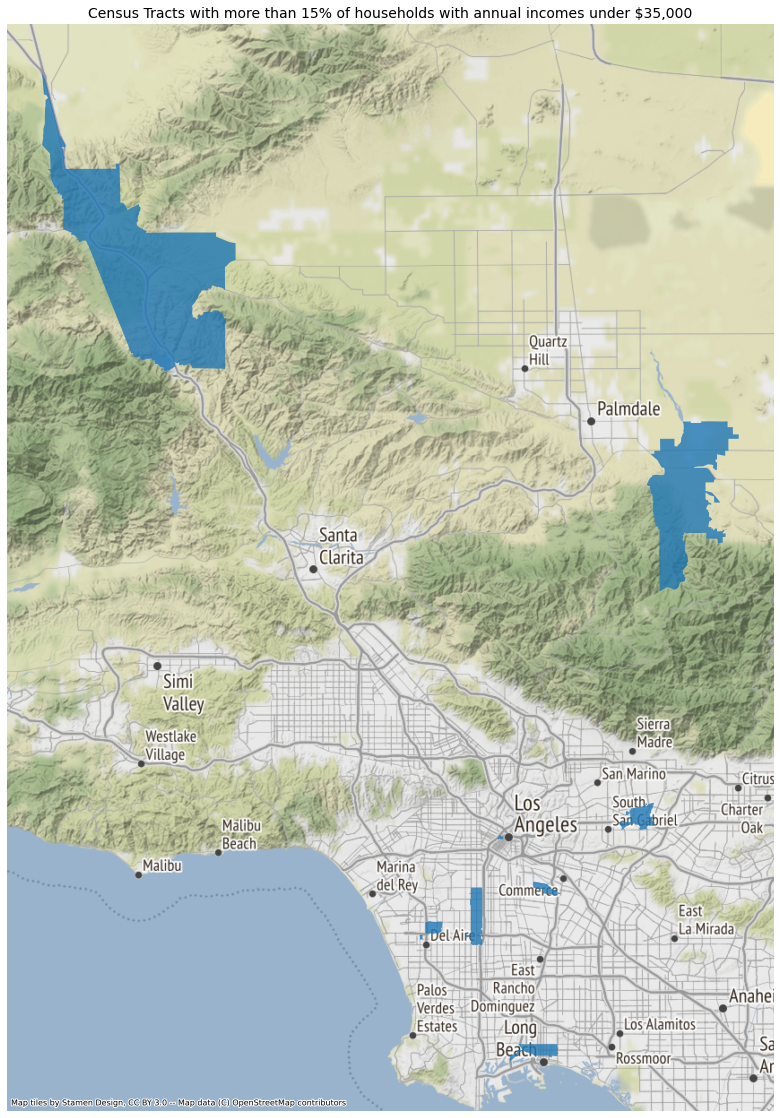

In [205]:
fig, ax = plt.subplots(figsize=(20, 20))

income_web_mercator[income['Percent $10,000 to $19,999'and'Percent $20,000 to $34,999'] > 15].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with more than 15% of households with annual incomes under $35,000',fontsize=14)

ctx.add_basemap(ax)

## What comes next?

While this process has allowed me to gain a better understanding on household income levels across LA County, I still need to find a way to connect all of this information to our focus on mobile home park communities in LA County. This may be a great starting off point to understanding where some of the highlighted income areas lay in relation to the location of mobile home parks.